# LABOUR DATA CASE STUDY

## Multiple linear regression

### STEP 1: Import libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
labour = pd.read_csv('D:/IMS Proschool/Business Analytics/Linear regression/Case 1/LabourTrainingEvaluationData.csv')

### >Summarize the data (EDA)

In [3]:
labour.head()

,Age,Education,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [4]:
labour.shape

(15992, 9)

In [5]:
labour.isnull().sum()

Age              0
Education        0
Race             0
Hisp             0
MaritalStatus    0
Nodeg            0
Earnings_1974    0
Earnings_1975    0
Earnings_1978    0
dtype: int64

In [6]:
labour.count()

Age              15992
Education        15992
Race             15992
Hisp             15992
MaritalStatus    15992
Nodeg            15992
Earnings_1974    15992
Earnings_1975    15992
Earnings_1978    15992
dtype: int64

In [7]:
labour.Nodeg.value_counts()

0    11261
1     4731
Name: Nodeg, dtype: int64

In [11]:
labour.Race.value_counts()

NotBlack    14816
black        1176
Name: Race, dtype: int64

In [12]:
labour.Hisp.value_counts()

NotHispanic    14840
hispanic        1152
Name: Hisp, dtype: int64

In [13]:
labour.MaritalStatus.value_counts()

Married       11382
NotMarried     4610
Name: MaritalStatus, dtype: int64

In [14]:
labour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15992 entries, 0 to 15991
Data columns (total 9 columns):
Age              15992 non-null int64
Education        15992 non-null object
Race             15992 non-null object
Hisp             15992 non-null object
MaritalStatus    15992 non-null object
Nodeg            15992 non-null int64
Earnings_1974    15992 non-null float64
Earnings_1975    15992 non-null float64
Earnings_1978    15992 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


In [16]:
labour.Education.value_counts()

HighSchool            6252
LessThanHighSchool    4731
Intermediate          2708
graduate              1367
PostGraduate           934
Name: Education, dtype: int64

In [17]:
labour.describe(include='all')

,Age,Education,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992,15992,15992,15992,15992.000000,15992.000000,15992.000000,15992.000000
unique,NaN,5,2,2,2,NaN,NaN,NaN,NaN
top,NaN,HighSchool,NotBlack,NotHispanic,Married,NaN,NaN,NaN,NaN
freq,NaN,6252,14816,14840,11382,NaN,NaN,NaN,NaN
mean,33.225238,NaN,NaN,NaN,NaN,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,NaN,NaN,NaN,NaN,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,24.000000,NaN,NaN,NaN,NaN,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,NaN,NaN,NaN,NaN,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,NaN,NaN,NaN,NaN,1.000000,23584.180000,22923.737500,25564.670000


### STEP 2: Visualising the data (EDA)

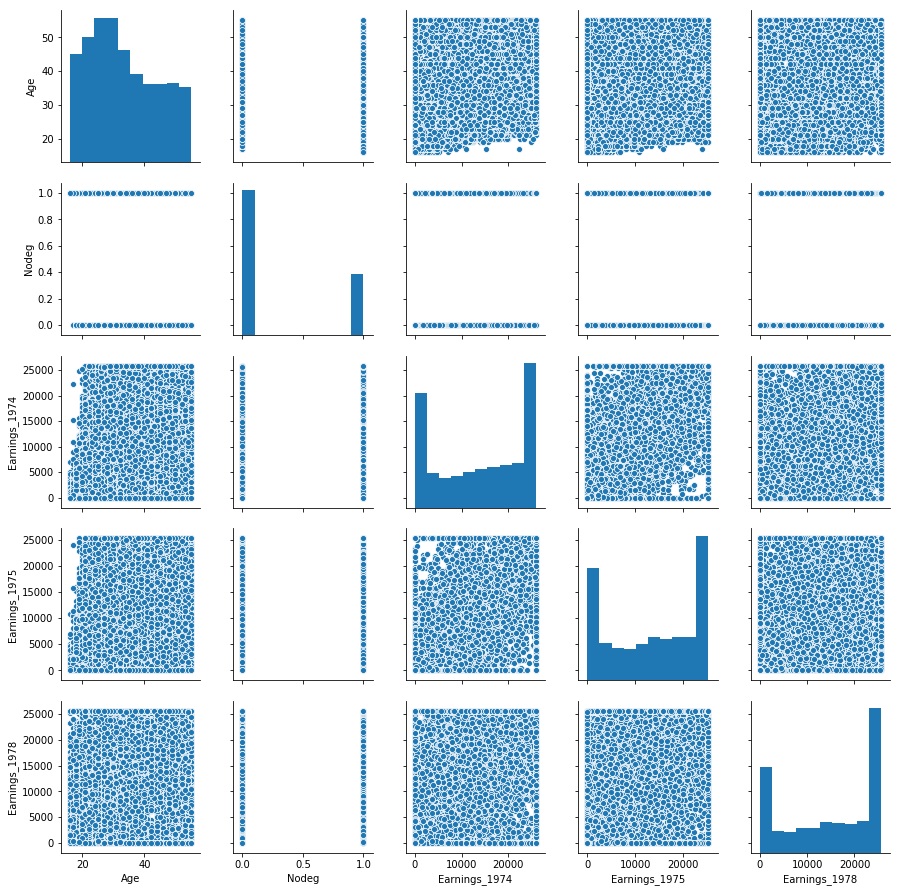

In [56]:
sns.pairplot(labour)
plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


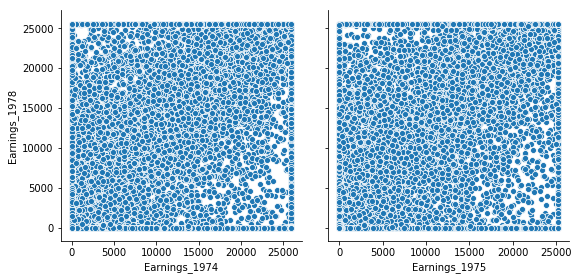

In [59]:
sns.pairplot(labour, x_vars=('Earnings_1974','Earnings_1975'), y_vars='Earnings_1978', size=4, kind='scatter')
plt.show()

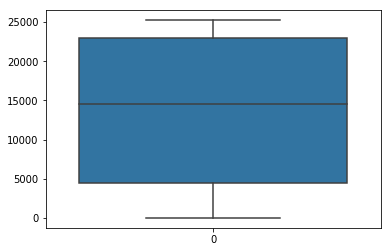

In [20]:
sns.boxplot(data = labour['Earnings_1975'])
plt.show()

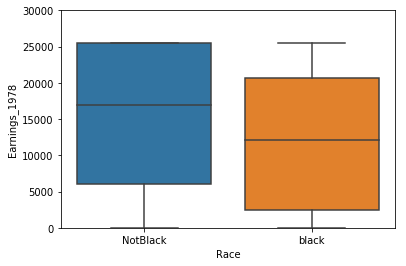

In [63]:
sns.boxplot(x=labour['Race'], y=labour['Earnings_1978'])
plt.ylim(0,30000)
plt.show()

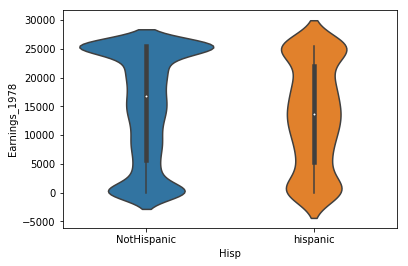

In [22]:
sns.violinplot(x=labour['Hisp'], y=labour['Earnings_1978'])
plt.show()

### >Creating dummy variables to create categorical data into numerical data (feature engineering)

In [23]:
labour_dummies = pd.get_dummies(labour[['Race','Hisp','MaritalStatus','Education']])

In [24]:
labour_dummies.head(3)

,Race_NotBlack,Race_black,Hisp_NotHispanic,Hisp_hispanic,MaritalStatus_Married,MaritalStatus_NotMarried,Education_HighSchool,Education_Intermediate,Education_LessThanHighSchool,Education_PostGraduate,Education_graduate
0,1,0,1,0,1,0,0,0,1,0,0
1,1,0,1,0,0,1,0,1,0,0,0
2,1,0,1,0,1,0,1,0,0,0,0


### >Separating numerical variables from the data

In [25]:
labour_num = labour[['Age','Nodeg','Earnings_1974','Earnings_1975','Earnings_1978']]

### >Combining numerical and dummy variables

In [26]:
labour_combined = pd.concat([labour_num, labour_dummies], axis=1)

In [27]:
labour_combined.head(3)

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978,Race_NotBlack,Race_black,Hisp_NotHispanic,Hisp_hispanic,MaritalStatus_Married,MaritalStatus_NotMarried,Education_HighSchool,Education_Intermediate,Education_LessThanHighSchool,Education_PostGraduate,Education_graduate
0,45,1,21516.670,25243.550,25564.67,1,0,1,0,1,0,0,0,1,0,0
1,21,0,3175.971,5852.565,13496.08,1,0,1,0,0,1,0,1,0,0,0
2,38,0,23039.020,25130.760,25564.67,1,0,1,0,1,0,1,0,0,0,0


In [28]:
labour_combined.shape

(15992, 16)

### STEP 3: Split the data into Train and Test set

##### We use the generic ratio of 70:30 to split the data into Train & Test set

In [29]:
X = labour_combined[['Age', 'Earnings_1974', 'Earnings_1975', 'Race_NotBlack', 'Race_black', 
                         'Hisp_NotHispanic', 'Hisp_hispanic','MaritalStatus_Married', 
                         'MaritalStatus_NotMarried', 'Education_HighSchool', 'Education_Intermediate',
                         'Education_LessThanHighSchool', 'Education_PostGraduate', 'Education_graduate']]

Y = labour['Earnings_1978']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=100)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### STEP 4: Performing linear regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
LR = LinearRegression()

### >Fit the model to train data

In [34]:
LR.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### STEP 5: Model Evaluation

In [35]:
print(LR.intercept_)

7444.554159632287


In [36]:
coeff_df = pd.DataFrame(LR.coef_, X_test.columns, columns=['Coefficient'])
print(coeff_df)

                              Coefficient
Age                           -105.198175
Earnings_1974                    0.287449
Earnings_1975                    0.477042
Race_NotBlack                  455.276440
Race_black                    -455.276440
Hisp_NotHispanic               318.966611
Hisp_hispanic                 -318.966611
MaritalStatus_Married           -6.798382
MaritalStatus_NotMarried         6.798382
Education_HighSchool          -348.648766
Education_Intermediate        -212.161446
Education_LessThanHighSchool  -525.158971
Education_PostGraduate         649.237226
Education_graduate             436.731957


### STEP 6: Model prediction

In [37]:
Y_pred = LR.predict(X_test)

### STEP 7: Model Performance Metrics

In [38]:
Y_pred

array([16540.04007348, 21097.91690793, 21837.01538353, ...,
       16316.77749664, 16704.39653636, 10399.89541609])

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
mse = mean_squared_error(Y_test, Y_pred)

In [41]:
print(mse)

50283398.726649806


#### Co-efficient of determination (R Square)

In [42]:
r2 = r2_score(Y_test, Y_pred)
r2

0.463928908706439

In [43]:
from math import sqrt

#### Root mean Squared error (RMSE)

In [44]:
rmse = sqrt(mse)
rmse

7091.078812610237

In [45]:
import statsmodels.api as sm

In [46]:
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)

C:\Users\DELL\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [47]:
LR2 = sm.OLS(Y_train,X_train_sm).fit()

In [48]:
LR2.params

const                           2757.242281
Age                             -105.198175
Earnings_1974                      0.287449
Earnings_1975                      0.477042
Race_NotBlack                   1833.897580
Race_black                       923.344701
Hisp_NotHispanic                1697.587751
Hisp_hispanic                   1059.654530
MaritalStatus_Married           1371.822759
MaritalStatus_NotMarried        1385.419523
Education_HighSchool             202.799690
Education_Intermediate           339.287010
Education_LessThanHighSchool      26.289486
Education_PostGraduate          1200.685682
Education_graduate               988.180413
dtype: float64

#### OLS Regression results

In [49]:
LR2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Earnings_1978   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     1031.
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:39:55   Log-Likelihood:            -1.1490e+05
No. Observations:               11194   AIC:                         2.298e+05
Df Residuals:                   11183   BIC:                         2.299e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         2757.2423    103.455     26.652      0.000    2554.452    2960.033
Age                           -105.1982      6.927    -15.187      0.000    -118.776     -91.620
Earnings_1974                    0.2874      0.015     19.804      0.000       0.259       0.316
Earnings_1975                    0.4770      0.015     32.677      0.000       0.448       0.506
Race_NotBlack                 1833.8976    115.178     15.922      0.000    1608.129    2059.666
Race_black                     923.3447    155.866      5.924      0.000     617.821    1228.869
Hisp_NotHispanic              1697.5878    116.524     14.569      0.000    1469.179    1925.996
Hisp_hispanic                 1059.6545    158.157      6.700      0.000     749.639    1369.670
MaritalStatus_Married         1371.8228    109.490     12.529      0.000    1157.203    1586.443
MaritalStatus_NotMarried      1385.4195     87.537     15.827      0.000    1213.831    1557.008
Education_HighSchool           202.7997    116.208      1.745      0.081     -24.988     430.587
Education_Intermediate         339.2870    150.406      2.256      0.024      44.465     634.109
Education_LessThanHighSchool    26.2895    128.490      0.205      0.838    -225.573     278.152
Education_PostGraduate        1200.6857    235.369      5.101      0.000     739.322    1662.050
Education_graduate             988.1804    196.918      5.018      0.000     602.187    1374.174
==============================================================================
Omnibus:                     1109.071   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1997.641
Skew:                          -0.683   Prob(JB):                         0.00
Kurtosis:                       4.555   Cond. No.                     3.84e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.19e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

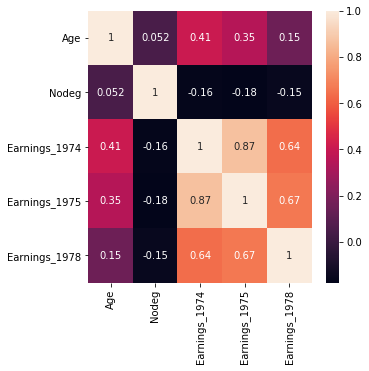

In [50]:
plt.figure(figsize = (5,5))
sns.heatmap(labour_num.corr(), annot=True)
plt.show()

### STEP 8: Implementing the results

#### >Actual v/s Predicted for first 150 observations

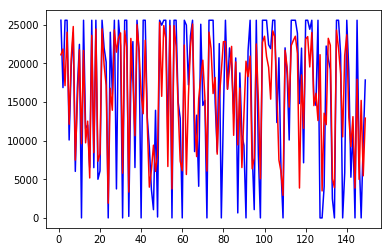

In [51]:
c = [i for i in range(1,150,1)]
fig = plt.figure()
plt.plot(c, Y_test[1:150], color='blue', linewidth=1.5, linestyle='-')
plt.plot(c, Y_pred[1:150], color='red', linewidth=1.5, linestyle='-')
plt.show()

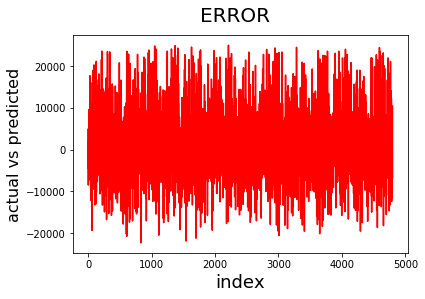

In [52]:
c2 = [i for i in range(1,4799,1)]
fig = plt.figure()
plt.plot(c2, Y_pred-Y_test, color='red')
fig.suptitle('ERROR', fontsize=20)
plt.xlabel('index', fontsize=18)
plt.ylabel('actual vs predicted', fontsize=16)
plt.show()

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [55]:
vif.round(3)

,VIF Factor,features
0,1.372,Age
1,4.406,Earnings_1974
2,4.181,Earnings_1975
3,inf,Race_NotBlack
4,inf,Race_black
5,inf,Hisp_NotHispanic
6,inf,Hisp_hispanic
7,inf,MaritalStatus_Married
8,inf,MaritalStatus_NotMarried
9,inf,Education_HighSchool
